# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [8]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [14]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [16]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = requests.get(btc_url).json()["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current ETH price
# YOUR CODE HERE!
eth_price = requests.get(eth_url).json()["data"]["1027"]["quotes"]["USD"]["price"]
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc 
my_eth_value = eth_price * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $50630.40
The current value of your 5.3 ETH is $16573.15


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [35]:
# Set current amount of shares
my_spy = 50
my_agg = 200

In [41]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [47]:
# Format current date as ISO format
# YOUR CODE HERE!
current_date = pd.Timestamp("2022-1-19", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stocks = api.get_barset(
    tickers,
    timeframe,
    start=current_date,
    limit=1000
).df
# Preview DataFrame
# YOUR CODE HERE!
df_stocks

AGG                                       SPY  \
                            open     high     low    close  volume    open   
time                                                                         
2022-01-19 00:00:00-05:00  111.7  111.755  111.66  111.755  602200  458.17   

                                                                
                               high     low     close   volume  
time                                                            
2022-01-19 00:00:00-05:00  459.6124  457.74  459.1899  7893422

In [48]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
spy_close_price = float(df_stocks["SPY"]["close"])
agg_close_price = float(df_stocks["AGG"]["close"])
# Print AGG and SPY close prices
print(f"Current SPY closing price: ${spy_close_price}")
print(f"Current AGG closing price: ${agg_close_price}")

Current SPY closing price: $459.1899
Current AGG closing price: $111.755


In [49]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy + spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $509.19
The current value of your 200 AGG shares is $22351.00


### Savings Health Analysis

In [53]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
my_crypto = my_btc_value + my_eth_value
my_stocks = my_agg_value + my_spy_value
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(
    [my_crypto,
    my_stocks],
    columns=["Amount"],
    index=["Crypto", "Shares"]
)
# Display savings DataFrame
display(df_savings)

,Amount
Crypto,67203.5530
Shares,22860.1899


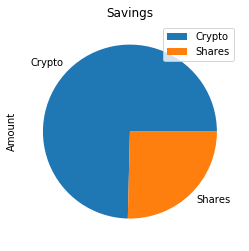

In [56]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="Amount", title="Savings")

In [68]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings["Amount"].sum()
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund :
    print("Congratulations! You have enough money in your savings account, go take a vacation.")
elif total_savings == emergency_fund :
    print("Congratulations! You have met your financial goal.")
else: print(f"You are ${emergency_fund - total_savings} away from meeting your financial goal.")

Congratulations! You have enough money in your savings account, go take a vacation.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [70]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-01-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-19', tz='America/New_York').isoformat()
timeframe="1D"

In [74]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data = alpaca_api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df
# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2018-01-30 00:00:00-05:00  108.12  108.120  107.92  108.005  2965870.0   
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.090  5729791.0   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.490  8569565.0   
2018-02-02 00:00:00-05:00  107.25  107.345  107.10  107.200  4266243.0   
2018-02-05 00:00:00-05:00  107.12  107.810  107.00  107.630  4879995.0   

                              SPY                                       
                             open    high     low   close       volume  
time                                                                    
2018-01-30 00:00:00-05:00     NaN     NaN     NaN     NaN          NaN  
2018-01-31 00:00:00-05:00  282.73  283.30  280.68  281.91   76360186.0  
2018-02-01 00:00:00-05:00  281.04  283.06  280.68  281.60   64693558.0  
2018-02-02 00:00:00-05:00  280.08  280.23  275.41  275.52  121717871.0  
2018-02-05 00:00:00-05:00  273.47  275.85  263.31  264.18  205971586.0

In [77]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
thirty_yr_forcast = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30,
)

In [78]:
# Printing the simulation input data
# YOUR CODE HERE!
thirty_yr_forcast.portfolio_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2018-01-30 00:00:00-05:00  108.12  108.120  107.92  108.005  2965870.0   
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.090  5729791.0   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.490  8569565.0   
2018-02-02 00:00:00-05:00  107.25  107.345  107.10  107.200  4266243.0   
2018-02-05 00:00:00-05:00  107.12  107.810  107.00  107.630  4879995.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-01-30 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-01-31 00:00:00-05:00     0.000787  282.73  283.30  280.68  281.91   
2018-02-01 00:00:00-05:00    -0.005551  281.04  283.06  280.68  281.60   
2018-02-02 00:00:00-05:00    -0.002698  280.08  280.23  275.41  275.52   
2018-02-05 00:00:00-05:00     0.004011  273.47  275.85  263.31  264.18   

                                                     
                                volume daily_return  
time                                                 
2018-01-30 00:00:00-05:00          NaN          NaN  
2018-01-31 00:00:00-05:00   76360186.0          NaN  
2018-02-01 00:00:00-05:00   64693558.0    -0.001100  
2018-02-02 00:00:00-05:00  121717871.0    -0.021591  
2018-02-05 00:00:00-05:00  205971586.0    -0.041159

In [79]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
thirty_yr_forcast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/prestonkirschner/Desktop/UM/workingcopy/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992381,0.998333,1.008173,0.993481,0.996668,0.978501,0.997852,0.987363,0.991978,0.998883,...,0.984187,1.014910,0.993482,0.998009,1.002914,0.997403,1.009236,0.992958,1.008515,0.989283
2,1.003223,0.991411,1.006207,1.000986,1.000095,0.976154,1.005140,0.990605,0.984157,1.007207,...,0.992312,1.022471,0.991990,0.991946,1.004968,1.002628,1.002350,0.985472,1.002555,0.983285
3,1.003838,1.006248,1.014551,0.992826,1.014386,0.984669,1.003654,0.979914,0.989486,0.994969,...,0.996280,1.017745,0.988282,0.973883,1.011035,0.991160,1.007289,0.976229,1.003352,0.983591
4,1.002343,1.006064,1.012596,0.994151,1.018284,0.981743,1.007365,0.983791,0.995840,0.980057,...,0.999547,1.001553,0.993659,0.978940,1.012175,0.994314,1.017305,0.972279,0.999811,0.983526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,33.745580,10.883270,20.397274,74.853549,23.116948,11.685296,10.344421,10.667316,15.426494,19.121116,...,8.051545,3.650365,8.418631,23.584953,8.840662,19.362142,65.176549,7.107402,17.900426,10.956276
7557,33.458788,10.985805,20.271298,74.293051,23.396511,11.641538,10.418439,10.849810,15.517272,18.762977,...,8.118290,3.630693,8.421079,23.625458,8.868877,19.074759,63.406306,7.057524,17.826445,10.891408
7558,33.256564,10.843670,20.635476,74.554115,23.343819,11.585629,10.297078,10.829479,15.457334,19.131090,...,8.149300,3.675768,8.420396,23.382851,8.886275,18.956329,63.929689,7.070379,17.854077,10.827504
7559,33.227399,10.866221,20.645463,74.861770,23.181818,11.577625,10.340488,10.995928,15.477580,19.004579,...,8.173364,3.699117,8.365969,23.753690,8.910836,19.128464,63.627606,7.077149,17.757983,10.756296


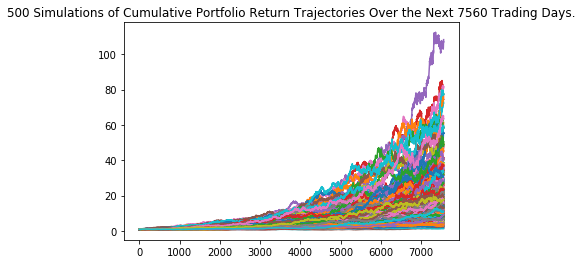

In [80]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = thirty_yr_forcast.plot_simulation()

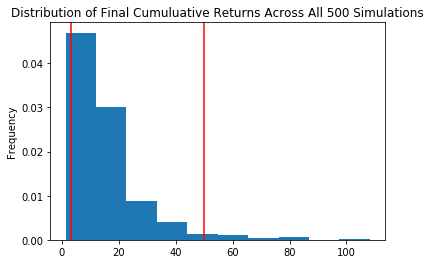

In [81]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = thirty_yr_forcast.plot_distribution()

### Retirement Analysis

In [82]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = thirty_yr_forcast.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
tbl

count           500.000000
mean             15.677459
std              12.817686
min               1.311196
25%               7.453627
50%              11.926429
75%              19.070001
max             108.228619
95% CI Lower      3.230844
95% CI Upper     49.900361
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [89]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[-2]*20000,2)
ci_upper = round(tbl[-1]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $64616.87 and $998007.23


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [90]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $96925.31 and $1497010.84


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")